# Task 1: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Load train and test datasets
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [68]:
train_df.head()

,Survived,Age,Embarked_Q,Embarked_S,Fare,Has_Cabin,Parch,Pclass,Sex,SibSp
0,0,22.0,0,1,7.2500,0,0,3,0,1
1,1,38.0,0,0,71.2833,1,0,1,1,1
2,1,26.0,0,1,7.9250,0,0,3,1,0
3,1,35.0,0,1,53.1000,1,0,1,1,1
4,0,35.0,0,1,8.0500,0,0,3,0,0


In [69]:
test_df.head()

,Age,Embarked_Q,Embarked_S,Fare,Has_Cabin,Parch,Pclass,Sex,SibSp
0,34.5,1,0,7.8292,0,0,3,0,0
1,47.0,0,1,7.0000,0,0,3,1,1
2,62.0,1,0,9.6875,0,0,2,0,0
3,27.0,0,1,8.6625,0,0,3,0,0
4,22.0,0,1,12.2875,0,1,3,1,1


In [4]:
# 2. Check for missing values
print("Missing values in Train Dataset:\n", train_df.isnull().sum(), "\n")
print("Missing values in Test Dataset:\n", test_df.isnull().sum(), "\n")

Missing values in Train Dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

Missing values in Test Dataset:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 



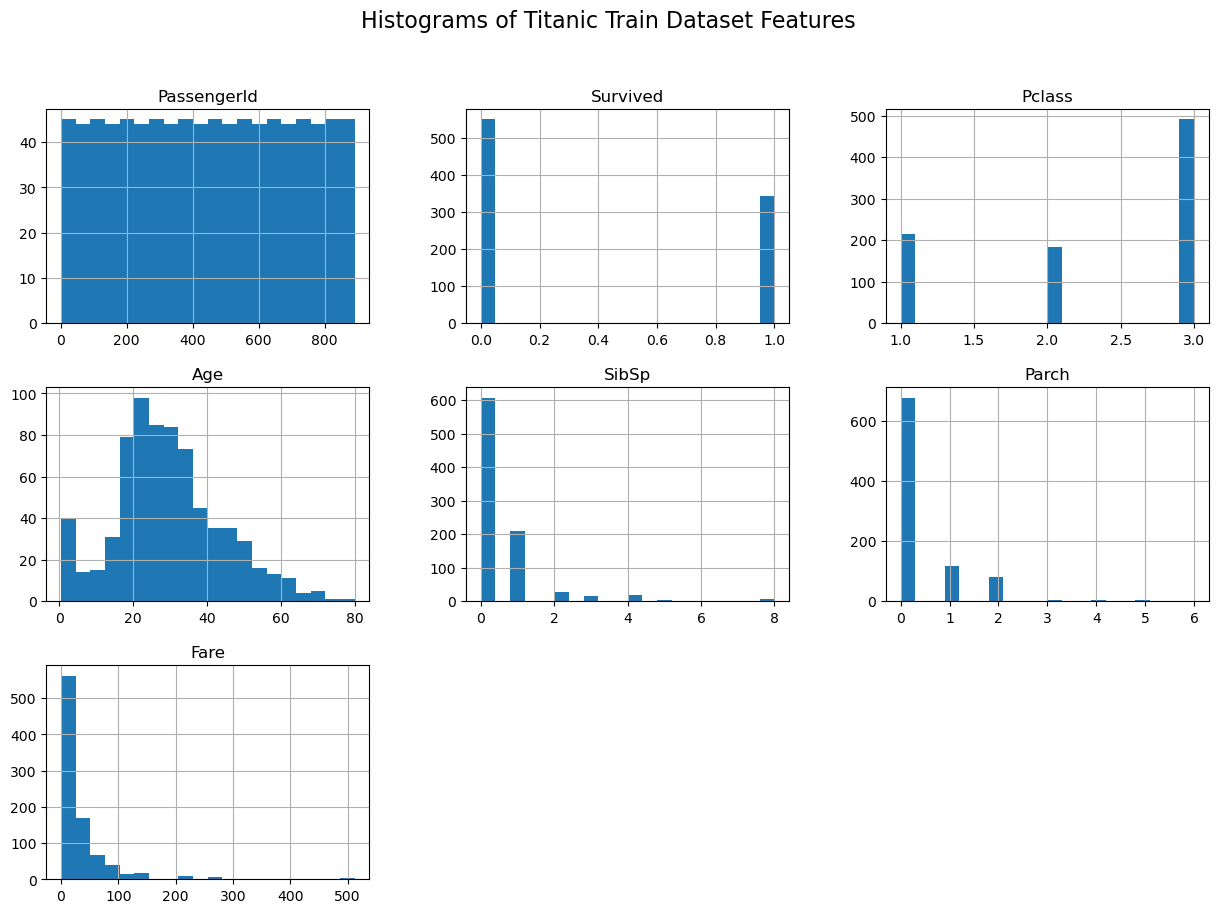

In [5]:
# 3. Explore data distributions using histograms and box plots

# Histograms of numerical columns
train_df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Titanic Train Dataset Features", fontsize=16)
plt.show()

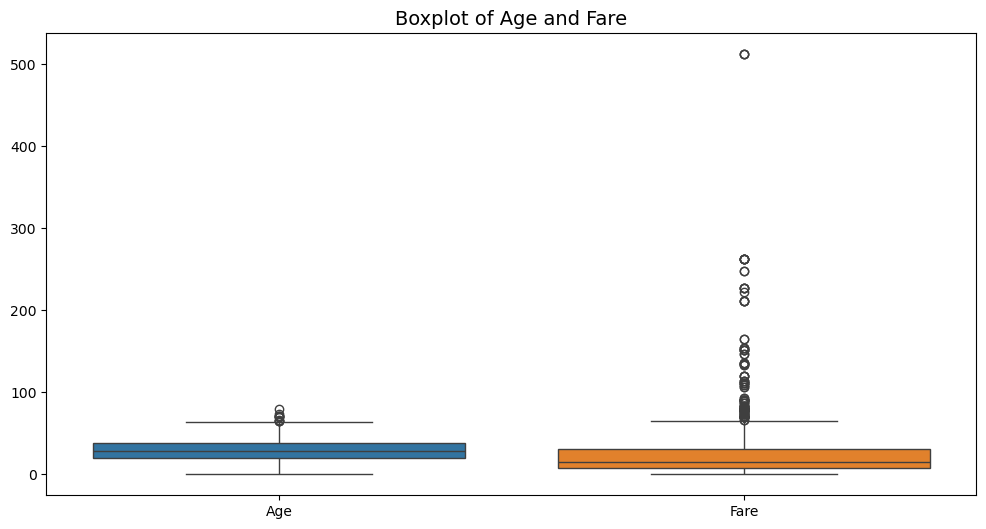

In [6]:
# Boxplots for Age and Fare
plt.figure(figsize=(12,6))
sns.boxplot(data=train_df[["Age","Fare"]])
plt.title("Boxplot of Age and Fare", fontsize=14)
plt.show()

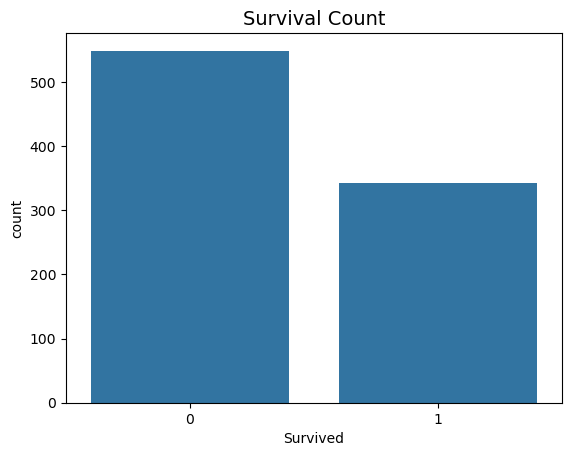

In [7]:
# 4. Visualize relationships between features and survival

# Bar plot - Survival count
sns.countplot(x="Survived", data=train_df)
plt.title("Survival Count", fontsize=14)
plt.show()

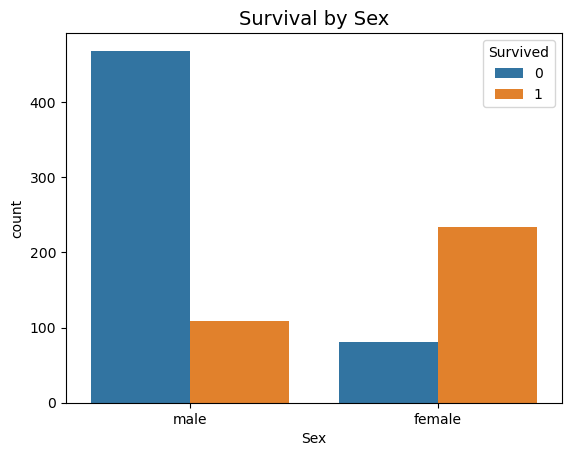

In [8]:
# Bar plot - Survival by Sex
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Survival by Sex", fontsize=14)
plt.show()

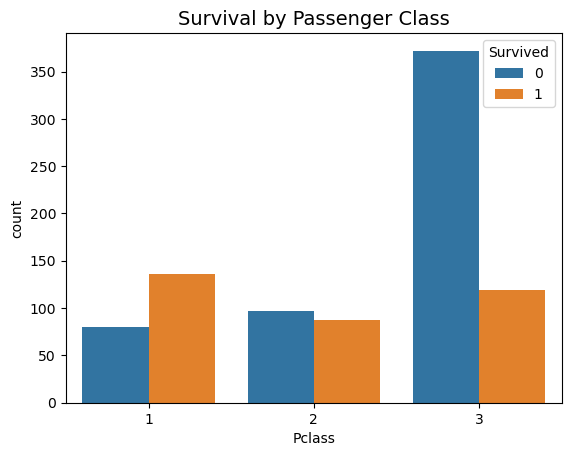

In [9]:
# Bar plot - Survival by Pclass
sns.countplot(x="Pclass", hue="Survived", data=train_df)
plt.title("Survival by Passenger Class", fontsize=14)
plt.show()

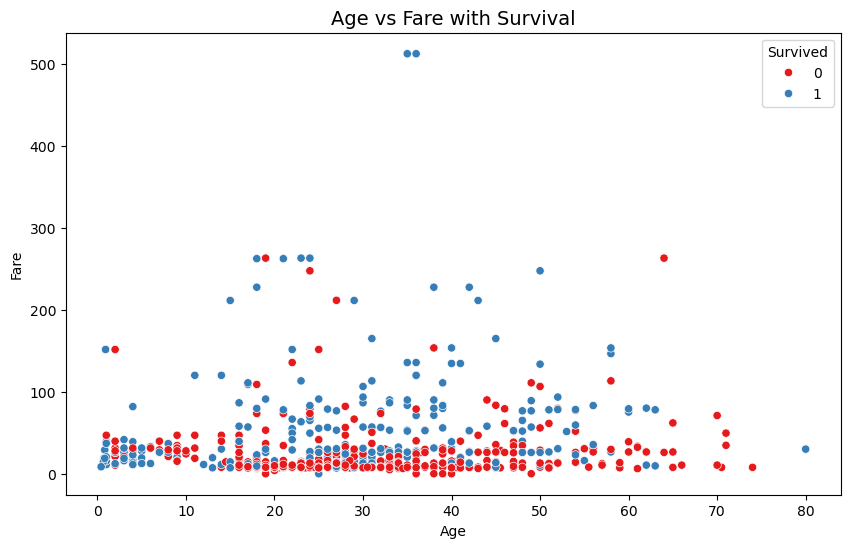

In [10]:
# Scatter plot - Age vs Fare colored by Survival
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=train_df, palette="Set1")
plt.title("Age vs Fare with Survival", fontsize=14)
plt.show()

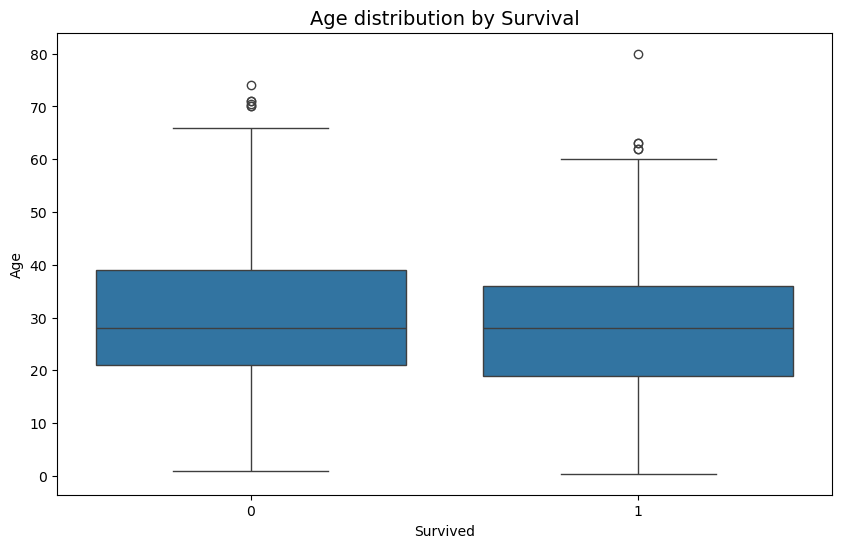

In [11]:
# Boxplot - Age distribution by Survival
plt.figure(figsize=(10,6))
sns.boxplot(x="Survived", y="Age", data=train_df)
plt.title("Age distribution by Survival", fontsize=14)
plt.show()

# Task 2: Data Preprocessing

In [12]:
# Fill missing values in Embarked with most frequent ('S')
train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])


In [13]:
# Fill missing Fare in test set with median
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())

In [14]:
# Create Has_Cabin feature (binary: 1 if cabin info is present, else 0)
train_df["Has_Cabin"] = train_df["Cabin"].notnull().astype(int)
test_df["Has_Cabin"] = test_df["Cabin"].notnull().astype(int)

In [15]:
# Drop original Cabin column
train_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)

In [16]:
# Fill missing Age values with median grouped by (Pclass, Sex)
for dataset in [train_df, test_df]:
    dataset["Age"] = dataset.groupby(["Pclass", "Sex"])["Age"].transform(
        lambda x: x.fillna(x.median())
    )

In [24]:
# Convert boolean columns to integers
bool_cols = train_df.select_dtypes(include=['bool']).columns
train_df[bool_cols] = train_df[bool_cols].astype(int)
test_df[bool_cols] = test_df[bool_cols].astype(int)

print(train_df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Has_Cabin  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500          0           0   
1         1       1    1  38.0      1      0  71.2833          1           0   
2         1       3    1  26.0      0      0   7.9250          0           0   
3         1       1    1  35.0      1      0  53.1000          1           0   
4         0       3    0  35.0      0      0   8.0500          0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


In [18]:
# One-hot encode Embarked (C, Q, S) → drop_first=True avoids dummy trap
train_df = pd.get_dummies(train_df, columns=["Embarked"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["Embarked"], drop_first=True)

In [19]:
# 3. Drop Unnecessary Columns

# Save PassengerId from test set for final submission
test_passenger_ids = test_df["PassengerId"]

In [20]:
# Drop irrelevant columns
train_df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
test_df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [25]:
# Final Check
print("Train dataset after preprocessing:")
print(train_df.head(), "\n")

Train dataset after preprocessing:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Has_Cabin  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500          0           0   
1         1       1    1  38.0      1      0  71.2833          1           0   
2         1       3    1  26.0      0      0   7.9250          0           0   
3         1       1    1  35.0      1      0  53.1000          1           0   
4         0       3    0  35.0      0      0   8.0500          0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1   



In [26]:
print("Test dataset after preprocessing:")
print(test_df.head(), "\n")

Test dataset after preprocessing:
   Pclass  Sex   Age  SibSp  Parch     Fare  Has_Cabin  Embarked_Q  Embarked_S
0       3    0  34.5      0      0   7.8292          0           1           0
1       3    1  47.0      1      0   7.0000          0           0           1
2       2    0  62.0      0      0   9.6875          0           1           0
3       3    0  27.0      0      0   8.6625          0           0           1
4       3    1  22.0      1      1  12.2875          0           0           1 



In [27]:
print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

Train dataset shape: (891, 10)
Test dataset shape: (418, 9)


# Task 3: Model Building (LightGBM & XGBoost)

In [28]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib
import os
SEED = 42
np.random.seed(SEED)

In [29]:
# Try to import the boosters
try:
    import lightgbm as lgb
except Exception as e:
    raise ImportError("lightgbm not installed. Install with `pip install lightgbm`") from e

try:
    import xgboost as xgb
except Exception as e:
    raise ImportError("xgboost not installed. Install with `pip install xgboost`") from e


In [30]:
# Load & Preprocess (reproducible)
def load_and_preprocess(train_path="Titanic_train.csv", test_path="Titanic_test.csv"):
    # Load
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # Fill Embarked (train) with mode
    if "Embarked" in train_df.columns:
        train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

    # Fill Fare (test)
    if "Fare" in test_df.columns:
        test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())

    # Has_Cabin feature
    train_df["Has_Cabin"] = train_df["Cabin"].notnull().astype(int)
    test_df["Has_Cabin"] = test_df["Cabin"].notnull().astype(int)

    # Drop Cabin
    if "Cabin" in train_df.columns:
        train_df.drop("Cabin", axis=1, inplace=True)
    if "Cabin" in test_df.columns:
        test_df.drop("Cabin", axis=1, inplace=True)

    # Fill Age with median grouped by Pclass & Sex (use transform to preserve index)
    # But ensure Sex exists as original text for grouping
    for df in [train_df, test_df]:
        # If Sex numeric already, convert to text groups temporarily for grouping if needed
        # In our flow Sex is text now, so grouping by text is fine.
        if "Pclass" in df.columns and "Sex" in df.columns and "Age" in df.columns:
            df["Age"] = df.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.median()))

    # Encode Sex
    train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1}).astype(int)
    test_df["Sex"] = test_df["Sex"].map({"male": 0, "female": 1}).astype(int)

    # One-hot encode Embarked (if present)
    if "Embarked" in train_df.columns:
        train_df = pd.get_dummies(train_df, columns=["Embarked"], drop_first=True)
    if "Embarked" in test_df.columns:
        test_df = pd.get_dummies(test_df, columns=["Embarked"], drop_first=True)

    # Save PassengerId for submission
    test_passenger_ids = test_df["PassengerId"] if "PassengerId" in test_df.columns else None

    # Drop identifiers / text columns
    drop_cols = []
    for col in ["PassengerId", "Name", "Ticket"]:
        if col in train_df.columns:
            drop_cols.append(col)
        if col in test_df.columns:
            # don't drop in test before saving ids - but we saved above
            pass

    train_df.drop([c for c in ["PassengerId", "Name", "Ticket"] if c in train_df.columns], axis=1, inplace=True)
    test_df.drop([c for c in ["PassengerId", "Name", "Ticket"] if c in test_df.columns], axis=1, inplace=True)

    # Make sure both dataframes have the same columns (except Survived)
    # Add missing dummy columns in test (or train) with zeros
    train_cols = set(train_df.columns)
    test_cols = set(test_df.columns)
    # Exclude target
    if "Survived" in train_cols:
        train_cols_minus_target = train_cols - {"Survived"}
    else:
        train_cols_minus_target = train_cols

    for col in sorted(train_cols_minus_target - test_cols):
        test_df[col] = 0
    for col in sorted(test_cols - train_cols_minus_target):
        # If test has a column train doesn't (rare), add to train with zeros
        if col != "Survived":
            train_df[col] = 0

    # Ensure column order consistent
    feature_cols = sorted([c for c in train_df.columns if c != "Survived"])
    train_df = train_df[["Survived"] + feature_cols]
    test_df = test_df[feature_cols]

    # Convert any boolean dummies to int
    bool_cols_train = train_df.select_dtypes(include=["bool"]).columns
    if len(bool_cols_train) > 0:
        train_df[bool_cols_train] = train_df[bool_cols_train].astype(int)
    bool_cols_test = test_df.select_dtypes(include=["bool"]).columns
    if len(bool_cols_test) > 0:
        test_df[bool_cols_test] = test_df[bool_cols_test].astype(int)

    return train_df, test_df, test_passenger_ids, feature_cols

In [31]:
train_df, test_df, test_passenger_ids, feature_cols = load_and_preprocess()

print("After preprocessing shapes -> train:", train_df.shape, " test:", test_df.shape)
print("Feature columns used:", feature_cols)

After preprocessing shapes -> train: (891, 10)  test: (418, 9)
Feature columns used: ['Age', 'Embarked_Q', 'Embarked_S', 'Fare', 'Has_Cabin', 'Parch', 'Pclass', 'Sex', 'SibSp']


In [32]:
# Prepare data for modeling
X = train_df[feature_cols].copy()
y = train_df["Survived"].copy()

In [33]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

In [34]:
scaler = StandardScaler()

In [35]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [36]:
# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=SEED
)

In [37]:
print("Train/val split:", X_train.shape, X_val.shape)

Train/val split: (712, 9) (179, 9)


In [38]:
# LightGBM - baseline + RandomizedSearchCV tuning
lgb_model = lgb.LGBMClassifier(random_state=SEED, n_jobs=-1)

lgb_param_dist = {
    "num_leaves": [15, 31, 63],
    "n_estimators": [100, 300, 500],
    "max_depth": [-1, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.6, 0.8, 1.0],
}

lgb_cv = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=lgb_param_dist,
    n_iter=20,
    scoring="roc_auc",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED),
    random_state=SEED,
    n_jobs=-1,
    verbose=1
)


In [39]:
print("Tuning LightGBM (RandomizedSearchCV)...")

Tuning LightGBM (RandomizedSearchCV)...


In [40]:
lgb_cv.fit(X_train, y_train)
print("Best LightGBM params:", lgb_cv.best_params_)
print("Best LightGBM CV ROC-AUC:", lgb_cv.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [41]:
best_lgb = lgb_cv.best_estimator_

In [43]:
best_lgb

,boosting_type,'gbdt'
,num_leaves,15
,max_depth,10
,learning_rate,0.1
,n_estimators,300
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [44]:
# Evaluate on validation set
y_pred_lgb = best_lgb.predict(X_val)
y_proba_lgb = best_lgb.predict_proba(X_val)[:, 1]

print("\nLightGBM Validation Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_lgb))
print("Precision:", precision_score(y_val, y_pred_lgb))
print("Recall:", recall_score(y_val, y_pred_lgb))
print("F1:", f1_score(y_val, y_pred_lgb))
print("ROC AUC:", roc_auc_score(y_val, y_proba_lgb))
print("\nClassification Report:\n", classification_report(y_val, y_pred_lgb))


LightGBM Validation Metrics:
Accuracy: 0.7988826815642458
Precision: 0.746268656716418
Recall: 0.7246376811594203
F1: 0.7352941176470589
ROC AUC: 0.8132411067193676

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [45]:
# Cross-validated accuracy & ROC-AUC (for reference)
cv_acc = cross_val_score(best_lgb, X, y, cv=5, scoring="accuracy", n_jobs=-1)
cv_auc = cross_val_score(best_lgb, X, y, cv=5, scoring="roc_auc", n_jobs=-1)
print("LightGBM CV Accuracy (5-fold):", cv_acc.mean(), " +/- ", cv_acc.std())
print("LightGBM CV ROC-AUC (5-fold):", cv_auc.mean(), " +/- ", cv_auc.std())

LightGBM CV Accuracy (5-fold): 0.8215805661917017  +/-  0.027139479041694708
LightGBM CV ROC-AUC (5-fold): 0.8717463544144133  +/-  0.025388100037441814


In [46]:
# XGBoost - baseline + RandomizedSearchCV tuning
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=SEED, n_jobs=-1)

xgb_param_dist = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
}

xgb_cv = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=20,
    scoring="roc_auc",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED),
    random_state=SEED,
    n_jobs=-1,
    verbose=1
)

print("\nTuning XGBoost (RandomizedSearchCV)...")


Tuning XGBoost (RandomizedSearchCV)...


In [47]:
xgb_cv.fit(X_train, y_train)
print("Best XGBoost params:", xgb_cv.best_params_)
print("Best XGBoost CV ROC-AUC:", xgb_cv.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGBoost params: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Best XGBoost CV ROC-AUC: 0.886652852981223


In [48]:
best_xgb = xgb_cv.best_estimator_

In [49]:
best_xgb

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [50]:
# Evaluate on validation set
y_pred_xgb = best_xgb.predict(X_val)
y_proba_xgb = best_xgb.predict_proba(X_val)[:, 1]

print("\nXGBoost Validation Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Precision:", precision_score(y_val, y_pred_xgb))
print("Recall:", recall_score(y_val, y_pred_xgb))
print("F1:", f1_score(y_val, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_val, y_proba_xgb))
print("\nClassification Report:\n", classification_report(y_val, y_pred_xgb))



XGBoost Validation Metrics:
Accuracy: 0.7821229050279329
Precision: 0.7586206896551724
Recall: 0.6376811594202898
F1: 0.6929133858267716
ROC AUC: 0.8411067193675889

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       110
           1       0.76      0.64      0.69        69

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



In [51]:
# Cross-validated accuracy & ROC-AUC
cv_acc_x = cross_val_score(best_xgb, X, y, cv=5, scoring="accuracy", n_jobs=-1)
cv_auc_x = cross_val_score(best_xgb, X, y, cv=5, scoring="roc_auc", n_jobs=-1)
print("XGBoost CV Accuracy (5-fold):", cv_acc_x.mean(), " +/- ", cv_acc_x.std())
print("XGBoost CV ROC-AUC (5-fold):", cv_auc_x.mean(), " +/- ", cv_auc_x.std())

XGBoost CV Accuracy (5-fold): 0.8305442219571904  +/-  0.025348821107175575
XGBoost CV ROC-AUC (5-fold): 0.8761905452611476  +/-  0.03251606698349923


In [52]:
#  Compare & Save Models + Submission
# Choose better model by ROC-AUC on validation (or other criterion)
lgb_val_auc = roc_auc_score(y_val, y_proba_lgb)
xgb_val_auc = roc_auc_score(y_val, y_proba_xgb)

print("\nValidation ROC-AUC -> LightGBM: {:.4f} | XGBoost: {:.4f}".format(lgb_val_auc, xgb_val_auc))


Validation ROC-AUC -> LightGBM: 0.8132 | XGBoost: 0.8411


In [53]:
# Final prediction on test set using the better model
final_model = best_lgb if lgb_val_auc >= xgb_val_auc else best_xgb
print("Selected final model:", "LightGBM" if final_model is best_lgb else "XGBoost")

Selected final model: XGBoost


In [54]:
# Fit final_model on full training set (optional but recommended)
final_model.fit(X, y)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [55]:
# Predict on test set
test_preds = final_model.predict(test_df)
# If you need probabilities: final_model.predict_proba(test_df)[:,1]

In [56]:
# Prepare submission CSV (requires test_passenger_ids)
if test_passenger_ids is not None:
    submission = pd.DataFrame({
        "PassengerId": test_passenger_ids,
        "Survived": test_preds.astype(int)
    })
    submission.to_csv("titanic_submission.csv", index=False)
    print("Saved submission to titanic_submission.csv")
else:
    print("PassengerId not available to create submission CSV. test_passenger_ids is None.")


Saved submission to titanic_submission.csv


In [57]:
# Save trained models
os.makedirs("models", exist_ok=True)
joblib.dump(best_lgb, "models/best_lgb_model.joblib")
joblib.dump(best_xgb, "models/best_xgb_model.joblib")
joblib.dump(final_model, "models/final_selected_model.joblib")
print("Saved models to models/*.joblib")


Saved models to models/*.joblib


In [58]:
# Print feature importances (for tree models)
def print_importances(model, feature_names, top_n=15, model_name="Model"):
    if hasattr(model, "feature_importances_"):
        imp = model.feature_importances_
        fi = pd.Series(imp, index=feature_names).sort_values(ascending=False)
        print(f"\nTop {top_n} feature importances for {model_name}:")
        print(fi.head(top_n))
    else:
        print(f"{model_name} does not expose feature_importances_")

print_importances(best_lgb, feature_cols, model_name="LightGBM")
print_importances(best_xgb, feature_cols, model_name="XGBoost")

print("\nTask 3 completed: models trained, evaluated, saved; submission file created (if PassengerId exists).")



Top 15 feature importances for LightGBM:
Fare          1789
Age           1598
SibSp          180
Sex            161
Pclass         116
Parch          116
Embarked_S     111
Has_Cabin       89
Embarked_Q      22
dtype: int32

Top 15 feature importances for XGBoost:
Sex           0.628255
Pclass        0.100050
Has_Cabin     0.078591
Fare          0.037715
SibSp         0.036283
Age           0.035573
Embarked_S    0.030476
Parch         0.029483
Embarked_Q    0.023574
dtype: float32

Task 3 completed: models trained, evaluated, saved; submission file created (if PassengerId exists).


# Task 4: Comparative Analysis of LightGBM vs XGBoost

In [59]:
from sklearn.metrics import classification_report

In [60]:
# Compare Validation Performance
print("\n=== Comparative Metrics on Validation Set ===")


=== Comparative Metrics on Validation Set ===


In [61]:
# LightGBM
print("\nLightGBM Validation Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred_lgb))
print("Precision:", precision_score(y_val, y_pred_lgb))
print("Recall:", recall_score(y_val, y_pred_lgb))
print("F1:", f1_score(y_val, y_pred_lgb))
print("ROC AUC:", roc_auc_score(y_val, y_proba_lgb))


LightGBM Validation Performance:
Accuracy: 0.7988826815642458
Precision: 0.746268656716418
Recall: 0.7246376811594203
F1: 0.7352941176470589
ROC AUC: 0.8132411067193676


In [62]:
# XGBoost
print("\nXGBoost Validation Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Precision:", precision_score(y_val, y_pred_xgb))
print("Recall:", recall_score(y_val, y_pred_xgb))
print("F1:", f1_score(y_val, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_val, y_proba_xgb))


XGBoost Validation Performance:
Accuracy: 0.7821229050279329
Precision: 0.7586206896551724
Recall: 0.6376811594202898
F1: 0.6929133858267716
ROC AUC: 0.8411067193675889


In [63]:
# Summary of Differences
if lgb_val_auc > xgb_val_auc:
    better_model = "LightGBM"
else:
    better_model = "XGBoost"

print("\n=== Summary ===")
print(f"LightGBM ROC-AUC: {lgb_val_auc:.4f}")
print(f"XGBoost ROC-AUC: {xgb_val_auc:.4f}")
print(f"Better model (on validation set): {better_model}")


=== Summary ===
LightGBM ROC-AUC: 0.8132
XGBoost ROC-AUC: 0.8411
Better model (on validation set): XGBoost


In [64]:
# 3. Optional: Ensemble (Average Predictions)
# Combine probabilities
ensemble_proba = (y_proba_lgb + y_proba_xgb) / 2
ensemble_preds = (ensemble_proba >= 0.5).astype(int)

In [65]:
print("\nEnsemble Validation Performance:")
print("Accuracy:", accuracy_score(y_val, ensemble_preds))
print("Precision:", precision_score(y_val, ensemble_preds))
print("Recall:", recall_score(y_val, ensemble_preds))
print("F1:", f1_score(y_val, ensemble_preds))
print("ROC AUC:", roc_auc_score(y_val, ensemble_proba))


Ensemble Validation Performance:
Accuracy: 0.8044692737430168
Precision: 0.765625
Recall: 0.7101449275362319
F1: 0.7368421052631579
ROC AUC: 0.8317523056653492


In [66]:
# 4. Ensemble Submission
# Final predictions on test set with ensemble
test_proba_lgb = best_lgb.predict_proba(test_df)[:, 1]
test_proba_xgb = best_xgb.predict_proba(test_df)[:, 1]
test_proba_ensemble = (test_proba_lgb + test_proba_xgb) / 2
test_preds_ensemble = (test_proba_ensemble >= 0.5).astype(int)

submission_ensemble = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Survived": test_preds_ensemble
})

In [67]:
submission_ensemble.to_csv("titanic_submission_ensemble.csv", index=False)
print("\nSaved ensemble submission to titanic_submission_ensemble.csv")


Saved ensemble submission to titanic_submission_ensemble.csv
